<a href="https://colab.research.google.com/github/firarru/ML-Manual-Naive-Bayes/blob/uts/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
df_train = pd.read_excel("https://raw.githubusercontent.com/firarru/ML-Manual-Naive-Bayes/uts/Dataset/train_data.xlsx")
df_train

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi,Status BMI
0,Female,21,1.61,68.11,yes,yes,1.98,3.55,no,no,2.22,no,0.98,0.460,Sometimes,Public_Transportation,Overweight_Level_I
1,Female,19,1.63,77.86,yes,no,2.70,3.00,Sometimes,no,2.47,no,1.86,1.000,Sometimes,Public_Transportation,Overweight_Level_II
2,Female,22,1.61,82.47,yes,yes,1.56,1.00,Sometimes,no,2.37,no,0.29,2.000,Sometimes,Public_Transportation,Obesity_Type_I
3,Female,26,1.61,107.01,yes,yes,3.00,3.00,Sometimes,no,2.68,no,0.00,0.509,Sometimes,Public_Transportation,Obesity_Type_III
4,Female,44,1.59,77.00,yes,yes,2.00,3.00,Sometimes,no,2.81,no,0.00,0.000,Sometimes,Automobile,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,Female,18,1.60,56.00,yes,yes,2.00,1.00,Always,no,2.00,no,1.00,0.000,Sometimes,Walking,Normal_Weight
1675,Male,35,1.82,91.63,yes,yes,2.00,2.99,Sometimes,no,1.29,no,0.88,0.854,Sometimes,Automobile,Overweight_Level_II
1676,Female,22,1.60,68.02,yes,yes,1.90,3.27,no,no,2.93,no,0.99,0.308,Sometimes,Public_Transportation,Overweight_Level_I
1677,Male,19,1.80,80.00,no,yes,2.00,1.00,Sometimes,no,2.00,no,2.00,1.000,Sometimes,Public_Transportation,Normal_Weight


In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Jenis Kelamin              1679 non-null   object 
 1   Umur                       1679 non-null   int64  
 2   Tinggi Badan (m)           1679 non-null   float64
 3   Berat Badan (kg)           1679 non-null   float64
 4   Riwayat Keluarga Obesitas  1679 non-null   object 
 5   FAVC                       1679 non-null   object 
 6   FCVC                       1679 non-null   float64
 7   NCP                        1679 non-null   float64
 8   CAEC                       1679 non-null   object 
 9   Merokok                    1679 non-null   object 
 10  CH2O                       1679 non-null   float64
 11  SCC                        1679 non-null   object 
 12  FAF                        1679 non-null   float64
 13  TUE                        1679 non-null   float

In [58]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Umur,1679.0,24.278142,6.417307,14.00,20.000,23.000,26.000,61.00
Tinggi Badan (m),1679.0,1.701191,0.094282,1.45,1.630,1.700,1.770,1.98
Berat Badan (kg),1679.0,86.119923,26.006783,39.00,65.000,82.530,106.045,173.00
FCVC,1679.0,2.410357,0.535666,1.00,2.000,2.340,3.000,3.00
NCP,1679.0,2.689833,0.781395,1.00,2.655,3.000,3.000,4.00
CH2O,1679.0,2.009053,0.613975,1.00,1.575,2.000,2.480,3.00
FAF,1679.0,1.011965,0.849282,0.00,0.130,1.000,1.670,3.00
TUE,1679.0,0.661108,0.611017,0.00,0.000,0.625,1.000,2.00


In [59]:
cat_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']
cat_num = [col for col in df_train.columns if df_train[col].dtype != 'object']

In [60]:
for col in cat_cols:
    print(df_train[col].value_counts())
    print()

Jenis Kelamin
Male      871
Female    808
Name: count, dtype: int64

Riwayat Keluarga Obesitas
yes    1376
no      303
Name: count, dtype: int64

FAVC
yes    1479
no      200
Name: count, dtype: int64

CAEC
Sometimes     1397
Frequently     194
no              44
Always          44
Name: count, dtype: int64

Merokok
no     1649
yes      30
Name: count, dtype: int64

SCC
no     1602
yes      77
Name: count, dtype: int64

CALC
Sometimes     1114
no             514
Frequently      49
Sometim          1
Always           1
Name: count, dtype: int64

Aktifitas Transportasi
Public_Transportation    1253
Automobile                368
Walking                    42
Motorbike                  11
Bike                        4
Name: count, dtype: int64

Status BMI
Obesity_Type_I         281
Obesity_Type_III       243
Obesity_Type_II        241
Overweight_Level_II    235
Normal_Weight          231
Overweight_Level_I     226
Insufficient_Weight    221
Name: count, dtype: int64



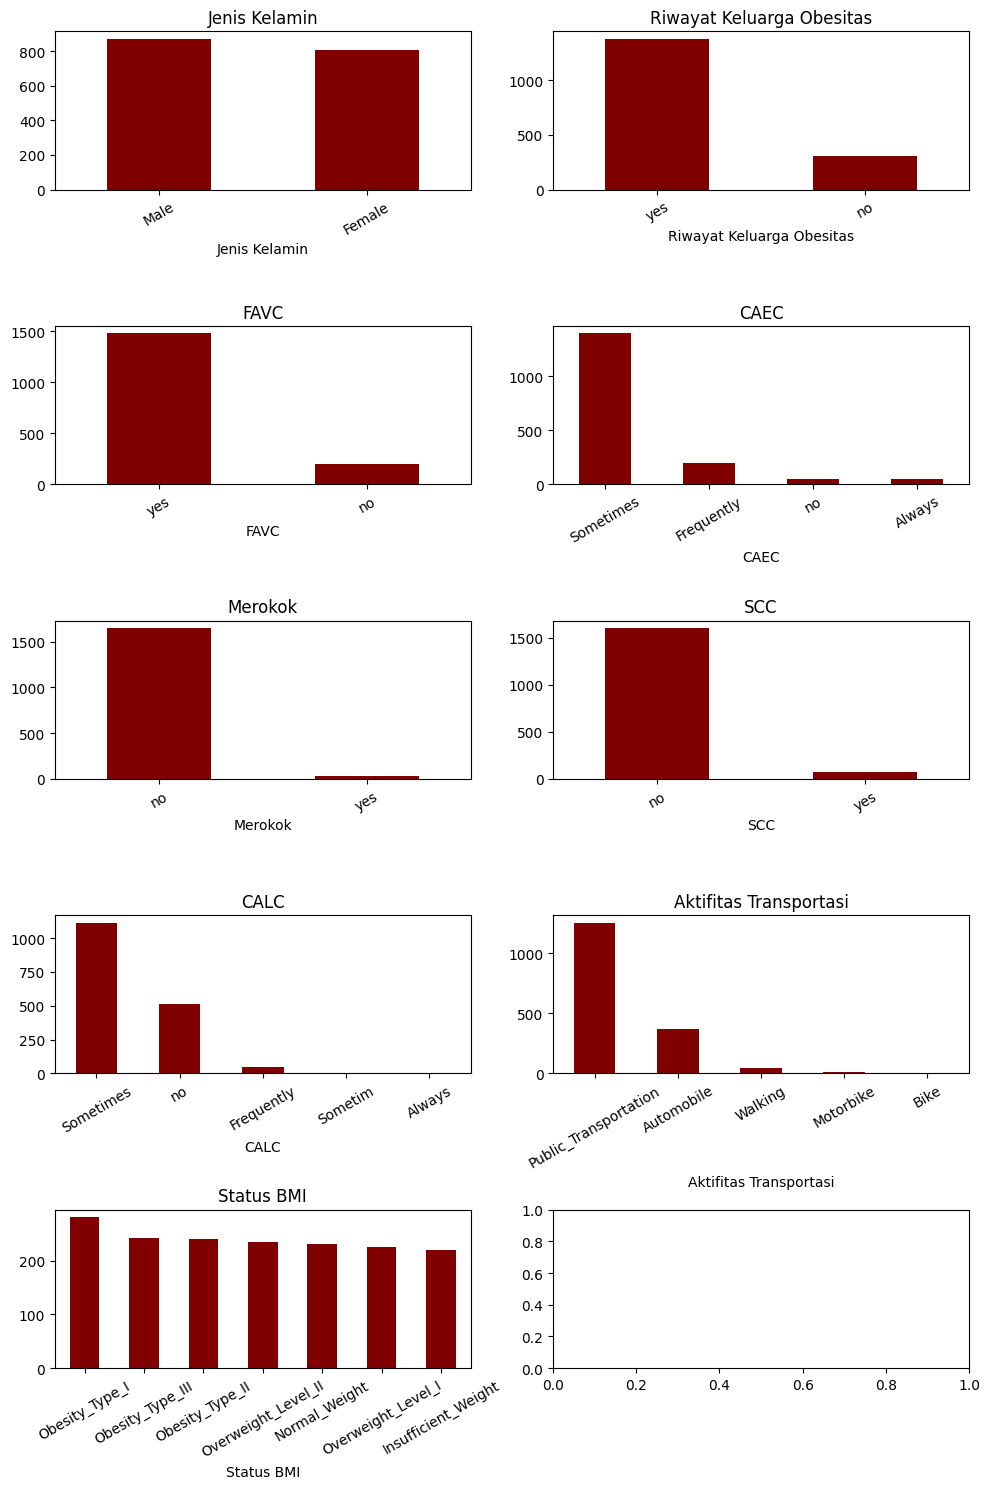

In [61]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    df_train[col].value_counts().plot(kind='bar', ax=axs[i], color='maroon')
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

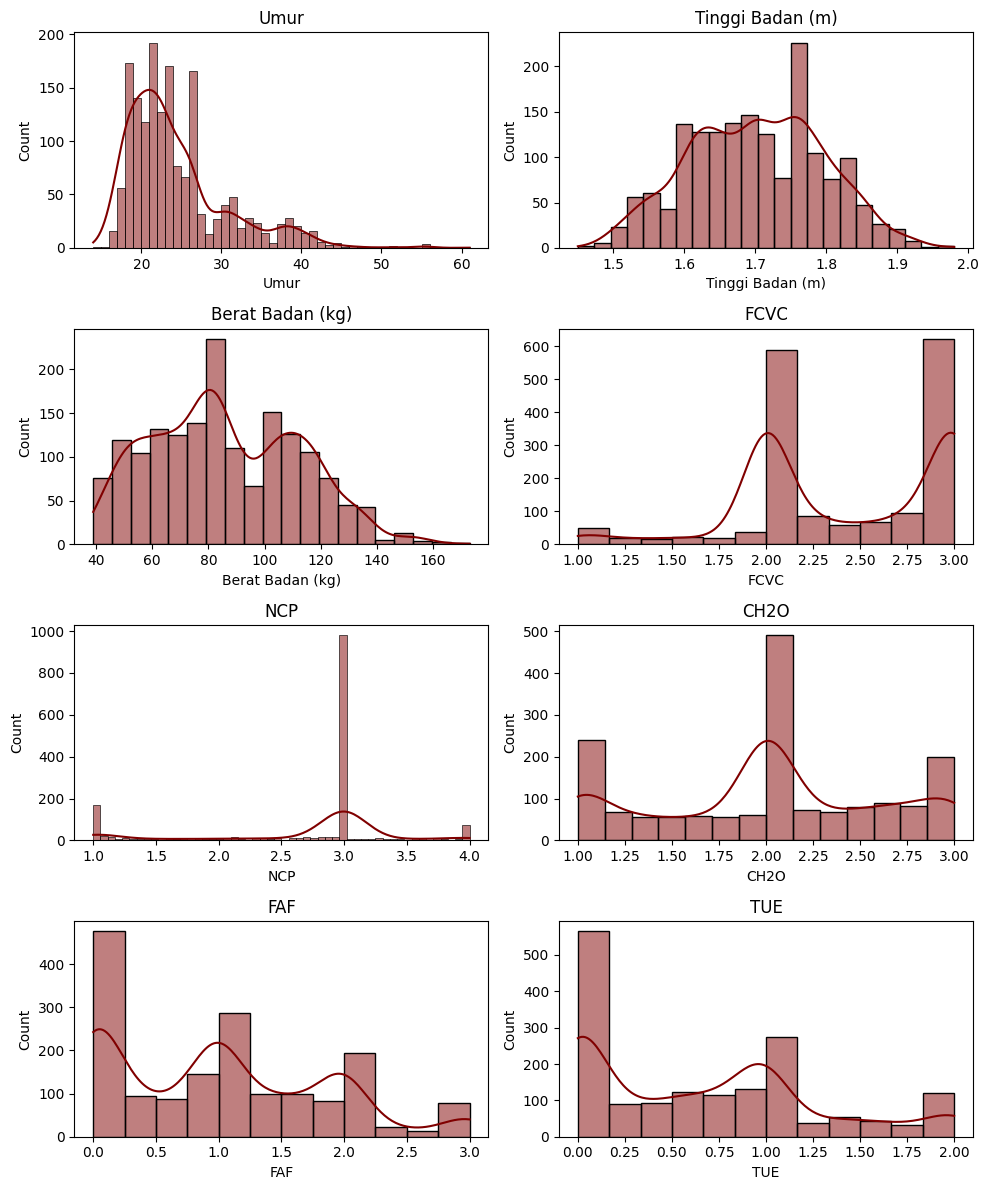

In [62]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axs = axs.flatten()

for i, col in enumerate(cat_num):
    sns.histplot(data=df_train, x=col, kde=True, ax=axs[i], color='maroon')
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

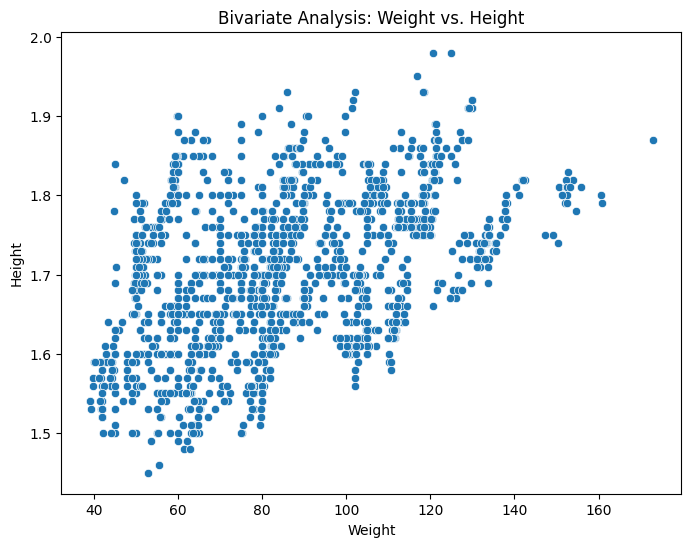

Correlation coefficient between Weight and Height: 0.4515520983654456


In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='Berat Badan (kg)', y='Tinggi Badan (m)')
plt.title('Bivariate Analysis: Weight vs. Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

# Add a correlation coefficient
correlation_coefficient = df_train['Berat Badan (kg)'].corr(df_train['Tinggi Badan (m)'])
print(f"Correlation coefficient between Weight and Height: {correlation_coefficient}")

In [64]:
X_train = df_train.loc[:, df_train.columns != 'Status BMI']
y_train = df_train['Status BMI']

In [65]:
y_train.unique()

array(['Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I',
       'Obesity_Type_III', 'Obesity_Type_II', 'Insufficient_Weight',
       'Normal_Weight', nan], dtype=object)

In [66]:
y_train.value_counts()

,count
Status BMI,
Obesity_Type_I,281
Obesity_Type_III,243
Obesity_Type_II,241
Overweight_Level_II,235
Normal_Weight,231
Overweight_Level_I,226
Insufficient_Weight,221


In [67]:
from sklearn.preprocessing import LabelEncoder
le = label_encoders = {}
for col in X_train.columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le

y_train = le.fit_transform(y_train)

<ipython-input-67-061751218456>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col])
<ipython-input-67-061751218456>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = le.fit_transform(X_train[col])
<ipython-input-67-061751218456>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [69]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in cat_cols:
#     df_train[col] = le.fit_transform(df_train[col])

In [70]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_train[cat_num] = scaler.fit_transform(df_train[cat_num])

In [71]:
df_train.tail()

,Jenis Kelamin,Umur,Tinggi Badan (m),Berat Badan (kg),Riwayat Keluarga Obesitas,FAVC,FCVC,NCP,CAEC,Merokok,CH2O,SCC,FAF,TUE,CALC,Aktifitas Transportasi,Status BMI
1674,Female,18,1.60,56.00,yes,yes,2.0,1.00,Always,no,2.00,no,1.00,0.000,Sometimes,Walking,Normal_Weight
1675,Male,35,1.82,91.63,yes,yes,2.0,2.99,Sometimes,no,1.29,no,0.88,0.854,Sometimes,Automobile,Overweight_Level_II
1676,Female,22,1.60,68.02,yes,yes,1.9,3.27,no,no,2.93,no,0.99,0.308,Sometimes,Public_Transportation,Overweight_Level_I
1677,Male,19,1.80,80.00,no,yes,2.0,1.00,Sometimes,no,2.00,no,2.00,1.000,Sometimes,Public_Transportation,Normal_Weight
1678,Female,21,1.68,121.64,yes,yes,3.0,3.00,Sometimes,no,1.48,no,0.74,0.605,Sometimes,Public_Transportation,Obesity_Type_III


In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
modelnb = naive_bayes.GaussianNB()
modelnb.fit(X_train_scaled, y_train)

GaussianNB()

In [76]:
# y_pred = modelnb.predict(X_test_scaled)